In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Optional (if using SMOTE)
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print(df.info())
print(df.describe())
print(df['Class'].value_counts())  # 0 = Not Fraud, 1 = Fraud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

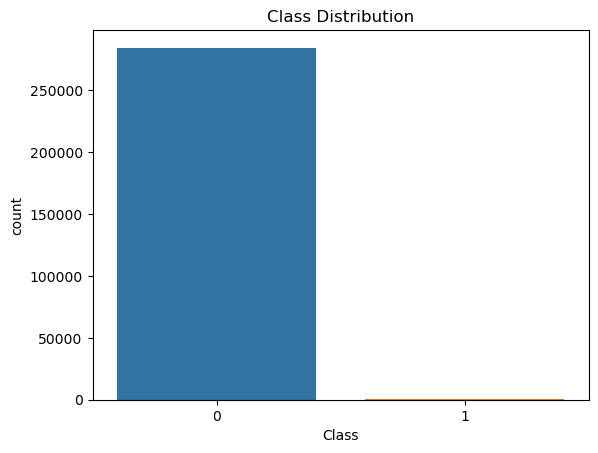

In [3]:
# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

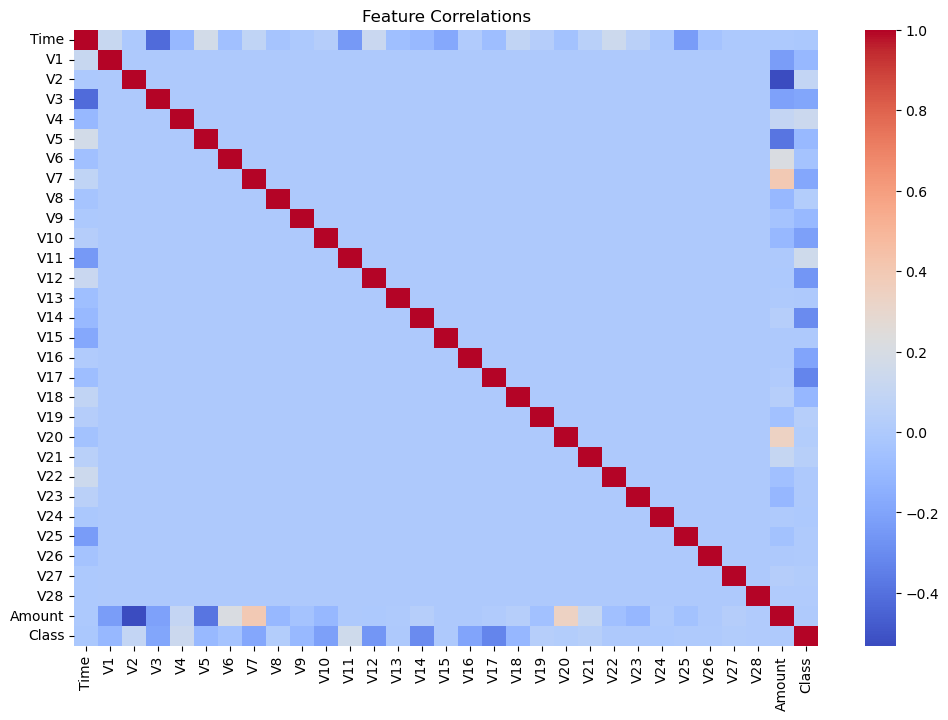

In [4]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()

In [5]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize amount and time columns if needed
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_resampled))


After SMOTE: [227451 227451]


Results for Random Forest:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56846    17]
 [    1 56862]]
ROC AUC Score: 0.9999987092537244
Results for Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     56863
           1       0.98      0.97      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
 [[55870   993]
 [ 1943 54920]]
ROC AUC Score: 0.9952861268710858
Results for XGBoost:

Classification Report:
               precisio

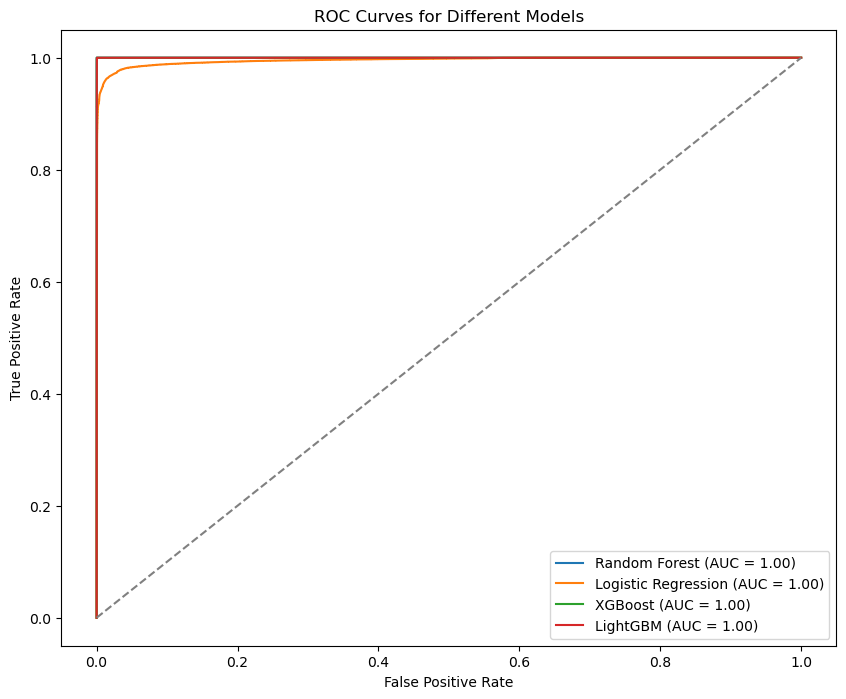

In [7]:
# Import necessary algorithms
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data (if not already done)
X = df.drop('Class', axis=1)
y = df['Class']

# Handle imbalanced data (SMOTE)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For AUC, ROC
    
    # Get ROC curve values
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Store results in dictionary
    results[name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'fpr': fpr,  # False Positive Rate
        'tpr': tpr   # True Positive Rate
    }

    # Print individual model results
    print(f"Results for {name}:\n")
    print("Classification Report:\n", results[name]['classification_report'])
    print("Confusion Matrix:\n", results[name]['confusion_matrix'])
    print("ROC AUC Score:", results[name]['roc_auc'])
    print("="*50)

# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f"{name} (AUC = {result['roc_auc']:.2f})")
    
plt.plot([0, 1], [0, 1], '--', color='gray')  # Random guess line
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        
    })

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

print("\n📊 Model Performance Comparison:")
print(results_df)



📊 Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.999842   0.999701  0.999982  0.999842  0.999999
1              XGBoost  0.999807   0.999613  1.000000  0.999807  0.999995
2             LightGBM  0.999472   0.998963  0.999982  0.999473  0.999908
3  Logistic Regression  0.974184   0.982240  0.965830  0.973966  0.995286
